### Custom Logistic Regression on Simulated Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('FinalDataSet.csv')

In [3]:
X = data.drop(columns = ['Unnamed: 0','Class'])
Y = data['Class']
print(X.shape)
print(Y.shape)

(2000, 2)
(2000,)


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y=le.fit_transform(Y)
print(Y)

[0 0 0 ... 1 1 1]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3)

In [6]:
def standard(X_train, X_test):
  X_train = np.asarray(X_train, dtype=np.float64)
  X_test = np.asarray(X_test, dtype=np.float64)
  mean = np.mean(X_train, axis = 0)
  std = np.std(X_train, axis = 0)
  print(mean)
  print(std)
  X_train = (X_train - mean)/std
  X_test = (X_test - mean)/std
  return X_train, X_test

In [7]:
X_train, X_test = standard(X_train, X_test)

[1.03655888 1.28029131]
[0.52977326 0.90234323]


In [8]:
X_train = X_train.T
X_test = X_test.T
Y_train = np.asarray(Y_train).reshape(-1,1).T
Y_test = np.asarray(Y_test).reshape(-1,1).T

In [9]:
# Sigmoid function
def sigmoid(z):
  sig = 1/(1+np.exp(-z))
  return sig

In [10]:
# initialize w and B
def I_parameters(feature_size):

  #w = np.random.randn(feature_size, 1)*0.01
  w = np.zeros((feature_size, 1))
  b = 0
  return w, b

In [11]:
# Function to compute cost and Gradient descent of w and B
def cost_fun(w, b, X, Y):
  m = X.shape[1]
  t = sigmoid(np.dot(w.T, X) + b)
  cost = (-1/m)*np.sum(Y*np.log(t) + (1-Y)*(np.log(1-t)))
  dw = (1/m)*np.dot(X, (t-Y).T)
  db = (1/m)*np.sum(t-Y)

  grad = {'dw':dw,'db':db}

  return grad, cost

In [12]:
# Stocastic gradient  Descent Function

def SGD(w, b, X, Y, num_iterations, learning_rate):
  cost_list = []
  for i in range(num_iterations):
    grad, cost = cost_fun(w, b, X, Y)

    dw = grad['dw']
    db = grad['db']

    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

    if i%10 == 0:
      cost_list.append(cost)

  params = {'w':w,'b':b}

  grad = {'dw':dw,'db':db}

  return params, grad, cost_list

In [13]:
def predict(w, b, X):
  Y_predict = np.zeros((1, X.shape[1]))
  w = w.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(w.T, X) + b)

  for i in range(A.shape[1]):
    if(A[0,i] <= 0.5):
      Y_predict[0,i] = 0
    else:
      Y_predict[0,i] = 1
  return Y_predict

In [14]:
#Merging all the functions to create one model

def Log_Reg(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.01):
  w, b = I_parameters(X_train.shape[0])
  parameters, grad, costs = SGD(w, b, X_train, Y_train, num_iterations, learning_rate)
  w = parameters['w']
  b = parameters['b']

  Y_pred_test = predict(w, b, X_test)
  Y_pred_train = predict(w, b, X_train)
  print('Train set accuracy : {} %'.format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))  
  print('Test set accuracy : {} %'.format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))
  print(w)
  print(b)
  final_values = {"costs": costs,"learning_rate" : learning_rate}
  return final_values


In [15]:
final_values = Log_Reg(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.01)

Train set accuracy : 96.42857142857143 %
Test set accuracy : 96.66666666666667 %
[[ 1.28283413]
 [-3.75404024]]
-0.09451432289558818


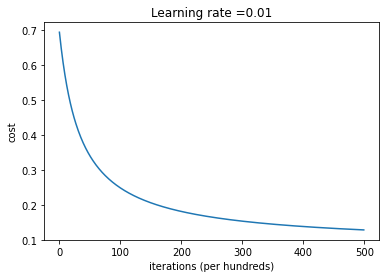

In [16]:

# Plot learning curve (with costs)
costs = np.squeeze(final_values['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(final_values["learning_rate"]))
plt.show()



learning rate is: 0.01
Train set accuracy : 96.42857142857143 %
Test set accuracy : 96.66666666666667 %
[[ 1.28283413]
 [-3.75404024]]
-0.09451432289558818

-------------------------------------------------------

learning rate is: 0.001
Train set accuracy : 94.92857142857143 %
Test set accuracy : 95.33333333333333 %
[[ 0.22720432]
 [-1.26196094]]
-0.020556918255185033

-------------------------------------------------------

learning rate is: 0.0001
Train set accuracy : 92.85714285714286 %
Test set accuracy : 93.33333333333333 %
[[ 0.00951417]
 [-0.19162322]]
-0.0030225696872195696

-------------------------------------------------------



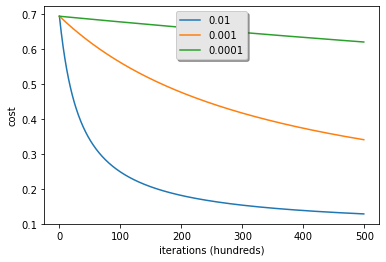

In [17]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = Log_Reg(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = i)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


In [18]:
#### Real World Data Set:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df=iris.frame

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
X = df.drop(columns = ['target'])
Y = df['target']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [21]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3)

In [24]:
X_train, X_test = standard(X_train, X_test)

[5.84285714 3.05904762 3.83619048 1.24095238]
[0.78568831 0.44693565 1.7380955  0.75273409]


In [25]:
X_train = X_train.T
X_test = X_test.T
Y_train = np.asarray(Y_train).reshape(-1,1).T
Y_test = np.asarray(Y_test).reshape(-1,1).T

In [26]:
final_values = Log_Reg(X_train, Y_train, X_test, Y_test, num_iterations = 100, learning_rate = 0.05)

Train set accuracy : 62.857142857142854 %
Test set accuracy : 75.55555555555556 %
[[ 1.69071763]
 [-0.89274315]
 [ 2.11240798]
 [ 2.19961225]]
2.1807420863918945


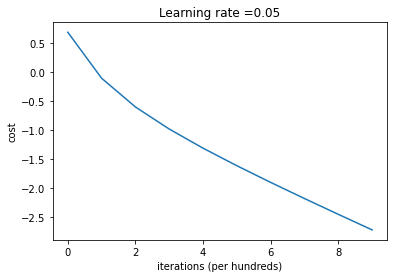

In [27]:
costs = np.squeeze(final_values['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(final_values["learning_rate"]))
plt.show()



learning rate is: 0.01
Train set accuracy : 61.904761904761905 %
Test set accuracy : 75.55555555555556 %
[[15.10962082]
 [-5.82575493]
 [17.99500913]
 [19.16677965]]
19.522391127318066

-------------------------------------------------------

learning rate is: 0.001


/Applications/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Train set accuracy : 62.857142857142854 %
Test set accuracy : 75.55555555555556 %
[[ 1.6852661 ]
 [-0.88850004]
 [ 2.10554946]
 [ 2.19300739]]
2.1772945611517316

-------------------------------------------------------

learning rate is: 0.0001
Train set accuracy : 60.95238095238095 %
Test set accuracy : 75.55555555555556 %
[[ 0.26318272]
 [-0.16663406]
 [ 0.33214336]
 [ 0.33593195]]
0.26288540722232334

-------------------------------------------------------



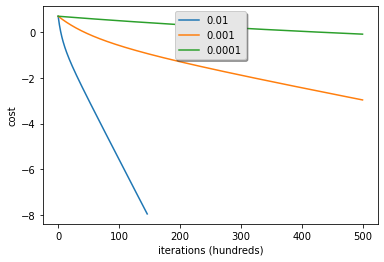

In [28]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = Log_Reg(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = i)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()